In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# load each countries clean csv
benin_df = pd.read_csv('../data/benin_cleaned.csv')
sierraleone_df = pd.read_csv('../data/sierraleone-bumbuna-clean.csv')
togo_df = pd.read_csv('../data/togo-dapaong-clean.csv')

# Metric Comparison

C:\Users\Abel Tesfa\AppData\Local\Temp\ipykernel_17556\46935103.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Benin', 'Sierra Leone', 'Togo'])


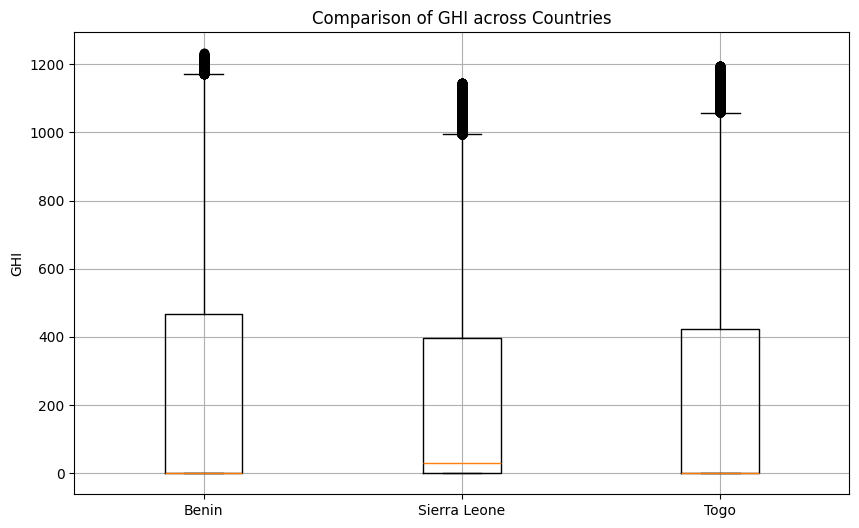

C:\Users\Abel Tesfa\AppData\Local\Temp\ipykernel_17556\46935103.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Benin', 'Sierra Leone', 'Togo'])


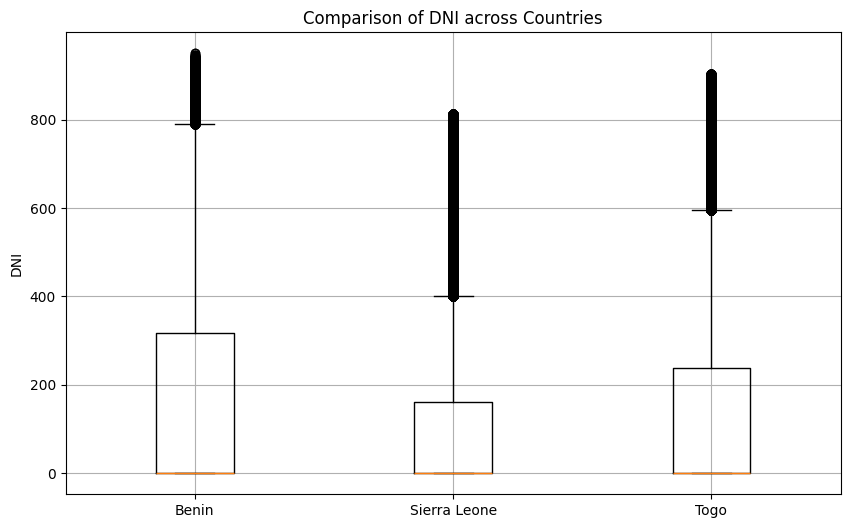

C:\Users\Abel Tesfa\AppData\Local\Temp\ipykernel_17556\46935103.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Benin', 'Sierra Leone', 'Togo'])


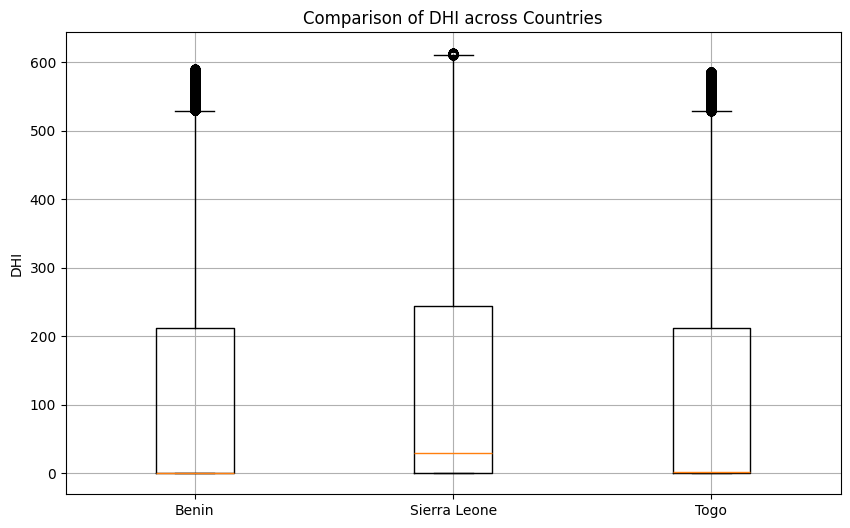

In [15]:
# Boxplots of GHI, DNI, DHI side by side 
metrics = ["GHI", "DNI", "DHI"]
for metric in metrics:
    data = [benin_df[metric], sierraleone_df[metric], togo_df[metric]]
    plt.figure(figsize=(10, 6))
    plt.boxplot(data, labels=['Benin', 'Sierra Leone', 'Togo'])
    plt.title(f'Comparison of {metric} across Countries')
    plt.ylabel(f'{metric}')
    plt.grid(True)  
    plt.show()

In [17]:
# summart table comparing mean, median, stddev of each metric across countries
summary_data = []
for country, df in zip(["Benin", "Sierra Leone", "Togo"], [benin_df, sierraleone_df, togo_df]):
    for metric in metrics:
        summary_data.append({
            "Country": country,
            "Metric": metric,
            "Mean": df[metric].mean(),
            "Median": df[metric].median(),
            "StdDev": df[metric].std()
        })

summary_df = pd.DataFrame(summary_data)
summary_df


,Country,Metric,Mean,Median,StdDev
0,Benin,GHI,237.484571,0.6,327.168111
1,Benin,DNI,167.144091,0.0,261.940361
2,Benin,DHI,113.166760,0.4,151.660240
3,Sierra Leone,GHI,219.636327,30.7,293.824764
4,Sierra Leone,DNI,124.017129,0.0,218.114588
5,Sierra Leone,DHI,127.301424,29.7,157.153691
6,Togo,GHI,225.030474,0.5,316.449819
7,Togo,DNI,147.970083,0.0,247.677152
8,Togo,DHI,112.778093,1.5,151.568181


# Statistical Testing

In [ ]:
# Run a one-way ANOVA on GHI values to access whether there are significant differences between the countries
from scipy.stats import f_oneway
ghi_benin = benin_df["GHI"]
ghi_sierraleone = sierraleone_df["GHI"] 
ghi_togo = togo_df["GHI"]

anova_result = f_oneway(ghi_benin, ghi_sierraleone, ghi_togo)

anova_result


F_onewayResult(statistic=np.float64(422.20669894104935), pvalue=np.float64(4.8959599391988e-184))

In [23]:
# Note the P values
print("P values:", anova_result.pvalue)

P values: 4.8959599391988e-184


# Key Observations

- Benin exhibits the highest mean and median values for GHI, DNI, and DHI, indicating a generally more favorable solar irradiance profile compared to Sierra Leone and Togo.
- Sierra Leone shows the greatest variability in solar irradiance metrics, as evidenced by its higher standard deviation values, suggesting more fluctuating solar conditions.
- The ANOVA test indicates statistically significant differences in GHI values among the three countries, with a p-value well below the 0.05 threshold, confirming that at least one country's solar irradiance profile is distinct from the others.

# Visual Summary

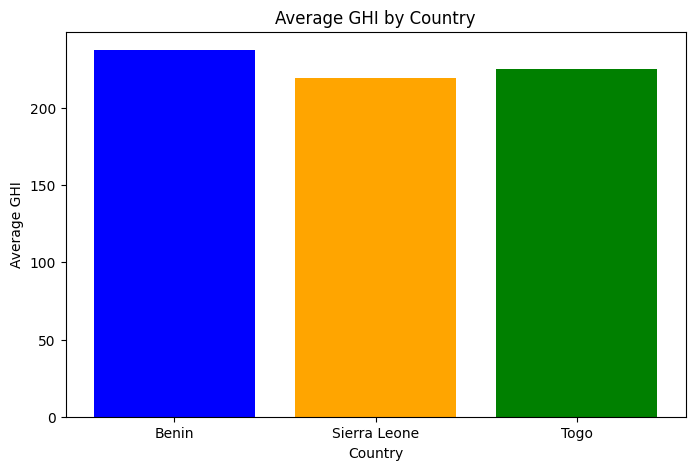

In [28]:
# A small barchart ranking countries by average GHI
plt.figure(figsize=(8, 5))
plt.bar(summary_df[summary_df["Metric"] == "GHI"]["Country"], summary_df[summary_df["Metric"] == "GHI"]["Mean"], color=['blue', 'orange', 'green'])
plt.title('Average GHI by Country')
plt.ylabel('Average GHI')
plt.xlabel('Country')
plt.show()